**COHORT ANALYSIS PROJECT FOR KPMG **

*   Create the cohort heat map
*   Find out the problems and suggest some insights



In [1]:
#Load dataset
from google.colab import files
uploaded = files.upload()

Saving KPMG Data.xlsx to KPMG Data.xlsx


#Overview this dataset

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
#loadfile
transaction= pd.read_excel('/content/KPMG Data.xlsx',sheet_name=0)

In [29]:
print(transaction.head(5))
transaction.info()
transaction.columns

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [30]:
transaction.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [31]:
# Replace the ' 's with NaN
transaction = transaction.replace(" ",np.NaN)

# Impute the missing values with mean imputation
transaction = transaction.fillna(transaction.mean())

# Count the number of NaNs in the dataset to verify
print(transaction.isnull().values.sum())

788


<ipython-input-31-318a2fce0251>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  transaction = transaction.fillna(transaction.mean())
<ipython-input-31-318a2fce0251>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transaction = transaction.fillna(transaction.mean())


In [32]:
transaction.isna().sum()
transaction.info()

#we can see there are some missing values in #6,7,8,9 with the type is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [33]:
print(transaction.info())
#Create a loop to replace the na value with the most frequent value in each columns
for col in transaction.columns:
    # Check if the column is of object type
    if transaction[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction[col] = transaction[col].fillna(transaction[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(transaction.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

#Start to explore and make a cohort

In [34]:
#Filtering orders_status is approved
is_Approved = transaction['order_status'] == 'Approved'
data = transaction[is_Approved]
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


Time cohorts: customers who signed up for a product or service during a particular time frame.
Customers will be divided into acquisition cohorts depending on the month of their first purchase. The cohort index would then be assigned to each of the customer’s purchases, which will represent the number of months since the first transaction.


In [35]:
#Drop duplicated values
data = data.drop_duplicates()
data
#the total row is remained the same -> no duplicated values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [36]:
#import some advanced libraries
import matplotlib.pyplot as plt
import datetime as dt

In [37]:
# Get month from transaction_date
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [38]:
# Create transaction_date column based on month and store in TransactionMonth
data['order_month'] = data['transaction_date'].apply(get_month)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19821 non-null  float64       
 5   order_status             19821 non-null  object        
 6   brand                    19821 non-null  object        
 7   product_line             19821 non-null  object        
 8   product_class            19821 non-null  object        
 9   product_size             19821 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19821 non-null  float64       
 12  product_first_sold_date  19821 n

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01


In [39]:
# Grouping by customer_id and select order_month
Customer_group = data.groupby('customer_id')['order_month']


In [40]:
# Finding the first transaction.
data['CohortMonth'] = Customer_group.transform('min')
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01,2017-01-01
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01,2017-01-01
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,2017-04-01
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01,2017-02-01


In [41]:
# Creating function to return year, month, day
def get_date_int(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `order_month` column
transaction_year, transaction_month,_ = get_date_int(data, 'order_month')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month,_= get_date_int(data, 'CohortMonth')

In [42]:
#  Get the  difference in years
years_diff = transaction_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
# calculate the difference in months between order_month vs CohortMonth
data['CohortIndex'] = years_diff * 12 + months_diff+1
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01,2017-01-01,6
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01,2017-01-01,11
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01,2017-04-01,1
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01,2017-02-01,6


In [43]:
# Counting daily active user from each cohort
Customer_groups = data.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer_id in each group of CohortMonth and CohortIndex
cohort_data = Customer_groups['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1347
1,2017-01-01,2,483
2,2017-01-01,3,505
3,2017-01-01,4,499
4,2017-01-01,5,492
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


In [44]:
 # Adding column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02-01,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03-01,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04-01,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05-01,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06-01,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Setup cohort_sizes, take all the row and only 1st column
cohort_sizes = cohort_counts.iloc[:,0]

cohort_sizes

CohortMonth
2017-01-01    1347.0
2017-02-01     800.0
2017-03-01     484.0
2017-04-01     337.0
2017-05-01     213.0
2017-06-01     123.0
2017-07-01      77.0
2017-08-01      51.0
2017-09-01      24.0
2017-10-01      20.0
2017-11-01      13.0
2017-12-01       4.0
Name: 1, dtype: float64

In [46]:
cohort_sizes.sum()

3493.0

In [47]:
#take the values from all columns then divide cohort_size(total)
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1.0,0.358575,0.374907,0.370453,0.365256,0.352635,0.380846,0.389013,0.363029,0.389013,0.365256,0.378619
2017-02-01,1.0,0.402500,0.371250,0.388750,0.353750,0.371250,0.382500,0.351250,0.406250,0.382500,0.365000,NaN
2017-03-01,1.0,0.345041,0.355372,0.338843,0.371901,0.380165,0.357438,0.431818,0.384298,0.371901,NaN,NaN
2017-04-01,1.0,0.326409,0.359050,0.451039,0.421365,0.350148,0.427300,0.370920,0.382789,NaN,NaN,NaN
2017-05-01,1.0,0.403756,0.389671,0.413146,0.342723,0.342723,0.347418,0.389671,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.365854,0.357724,0.382114,0.365854,0.365854,0.439024,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.337662,0.337662,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.352941,0.431373,0.352941,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.333333,0.291667,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Create retention index
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

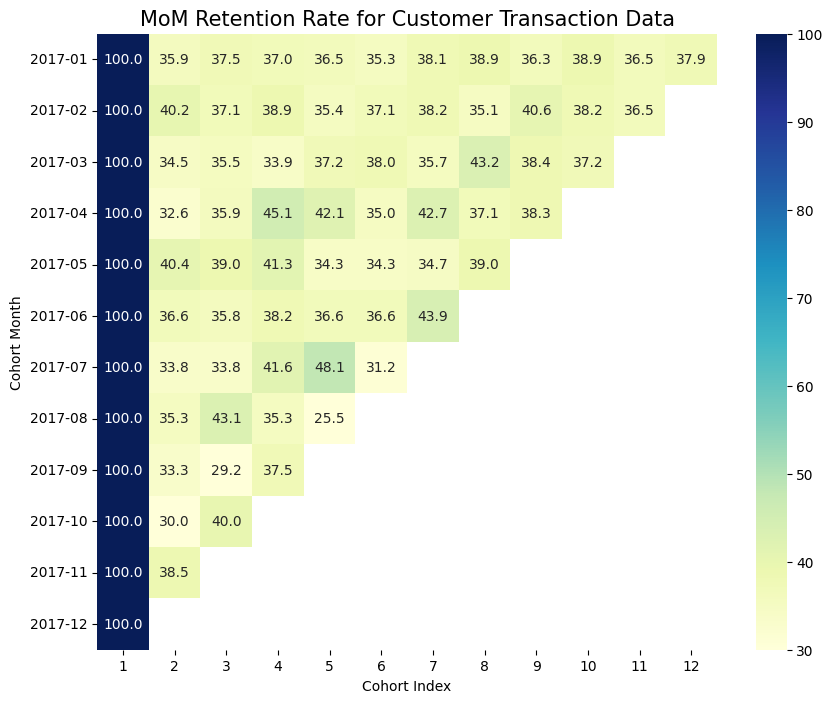

In [49]:
# Setup the figure size
plt.figure(figsize=(10, 8))

# Adding title for cohort chart
plt.title('MoM Retention Rate for Customer Transaction Data', fontsize = 15)

# Creating the cohort chart
sns.heatmap((retention*100).round(1), annot=True, fmt= '',cmap='YlGnBu', vmin = 30 , vmax = 100)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

#Insights from this cohort map

**Problems**
1. The overall trend in retention over user life time is quite stable with an average rate is approximately 35%.For the retention over the service/product, the table shows that the number of customers who made the first purchase decreased over 12 months, from 1347.0 in Jan 2017 to 4.0, predominantly in the first half of the year. The number of customers in the first month accounted for 38% of total 3493 people
After 1 month, the percentage of customers drop by roughly 65%.

2. From the heat map, the group of customers who joined in the first few months of the year had the tendency to come back and repurchase after 6 months. However, from the fourth group (2017-04), this percentage was improved, in particular, they come back only after 1-2 months.

3. Groups of customers who placed the first order in Feb and May 2017 had the higher retention rate than the other groups, which are 40,2 and 40,4 respectively

4. For the other cohorts, there are some interesting variations, anomalies in the heatmap. For example, the retention rate increases significantly around 45.1 and 48,1% in April and July 2017.

**Insights**
1. KPMG did a good job of keeping the stable retention rate over user life time but there is some thing happened with their products/services. Since the number of customers who made the first purchase declines over time-> reconsider about their product, service

2. From the fact that, we can identify that the marketing campaign to keep customers or pull them back is effective

3. We can focus on finding out the specifics from these groups and then design special offers or any marketing campaigns for the same time in next year

4. For the 3rd fact, this may be due to a change in the product or marketing strategy, or it may be due to a seasonal trend-> We can keep it in mind and analyze the factors of good marketing campaign which led to the repurchase of customers.

